### k-NN = k- NEARSET Neighbours method : It is classification algorithm it is also supervised learnings algorithms

In [1]:
# This necessary library used in data science 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   # to avoid the warnings during executing the program
warnings.filterwarnings('ignore')

In [2]:
# to load the dataset
df = pd.read_csv("User_Data.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [4]:
df["EstimatedSalary"].value_counts()

72000     12
80000     11
79000     10
71000      9
75000      9
          ..
48000      1
148000     1
101000     1
69000      1
126000     1
Name: EstimatedSalary, Length: 117, dtype: int64

In [5]:
# CHECK THE RECORDS
df.shape

(400, 5)

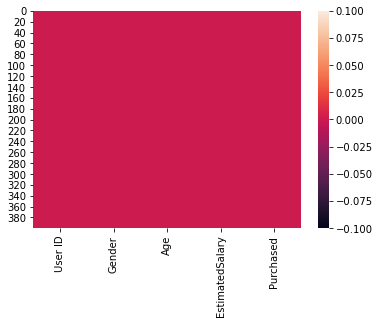

In [6]:
# CHECK THE NULL
sns.heatmap(df.isnull())
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
# Understanding dataset we drop the " UserID" AND " GENDER" COLUMNS
df.drop(["User ID","Gender"],axis = 1,inplace=True)

In [9]:
# Select the Input and Output
X = df.drop("Purchased",axis=1)  # Input
Y = df["Purchased"]   # Output

In [10]:
# Train test split
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [12]:
# Apply the scaling on X_Train and X_Test
from sklearn.preprocessing import StandardScaler
# Create the object of StandardScaler() class
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [13]:
# Create the function 
def create_model(model):
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [14]:
# call the class of confusion_matrix and Classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [15]:
# performing with help of baseline model
# use Logistic Regression class
from sklearn.linear_model import LogisticRegression

In [16]:
# Create the object of LogisticRegression() class
lr = LogisticRegression()

In [17]:
# Call the funciton
lr = create_model(lr)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        72
           1       0.83      0.71      0.76        48

    accuracy                           0.82       120
   macro avg       0.83      0.81      0.81       120
weighted avg       0.83      0.82      0.82       120

[[65  7]
 [14 34]]


In [18]:
# K- NEAREST NEIGHBOURS ALOGRITHMS
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Create the object of K-NEAREST Neighbors classifier class
knc = KNeighborsClassifier(n_neighbors=7,metric = "minkowski",p=2)
# p=2 means Euclidean metric means sqrt(x2 - x1)**2 + (y2- y1)**2

In [20]:
# Train the model by call the function
knc = create_model(knc)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        72
           1       0.79      0.92      0.85        48

    accuracy                           0.87       120
   macro avg       0.86      0.88      0.86       120
weighted avg       0.88      0.87      0.87       120

[[60 12]
 [ 4 44]]
